# BSM Call and Put Values for a European Option

### Load Relevant Libraries

In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad
import mpl_toolkits.mplot3d.axes3d as p3

### Functions to determine European Option Price

In [11]:
def dN(x):
    ''' Probability density function of standard normal random variable x.'''
    return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)

def N(d):
    ''' Cumulative density function of standard normal random variable x. 
        Integral of the Gaussian density function between -Infinity and d.
    '''    
    return quad(lambda x: dN(x), -np.Inf, d)[0]

def d1_func(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function.'''
    d1 = (np.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    
    return d1

def d2_func(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton d2 function.'''
    d1 = d1_func(St, K, t, T, r, sigma)
    d2 = d1 - sigma * np.sqrt(T - t)
    
    return d2

def BSM_call_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity/time-to-maturity if t = 0; T > t
    r:  float -> constant, risk-less short rate
    sigma:  float -> volatility
    
    Returns
    =======
    call_value:  float -> European call present value at t
    '''
    d1 = d1_func(St, K, t, T, r, sigma)
    d2 = d2_func(St, K, t, T, r, sigma)
    call_value = St * N(d1) - np.exp(-r * (T - t)) * K * N(d2)
    
    return call_value

def BSM_put_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European put option value (using put-call parity).
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity/time-to-maturity if t = 0; T > t
    r:  float -> constant, risk-less short rate
    sigma: float -> volatility
    
    Returns
    =======
    put_value: float -> European put present value at t
    '''
    put_value = BSM_call_value(St, K, t, T, r, sigma) - St + np.exp(-r * (T - t)) * K
    
    return put_value
    

### Function to plot variation in option prices with respect to parameters

In [8]:
def plot_values(function, 
                St = 70.0,     # Underlying Price 
                K = 100.0,      # Strike Price
                t = 0.0,        # Valuation date
                T = 1.0,        # Maturity date
                r = 0.05,       # risk-free rate
                sigma = 0.3):   # volatility
    
    ''' Plots European option values for different parameters. '''
    plt.figure(figsize=(10, 8.3))
    points = 1000

    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(50, K + 50, points)
    vlist = [function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')
    
    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')
    
    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.20, points)
    vlist = [function(St, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')
    
    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St, K, t, T, r, sigma) for sigma in slist] 
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()

### Plot variations in call-option prices with respect to parameters

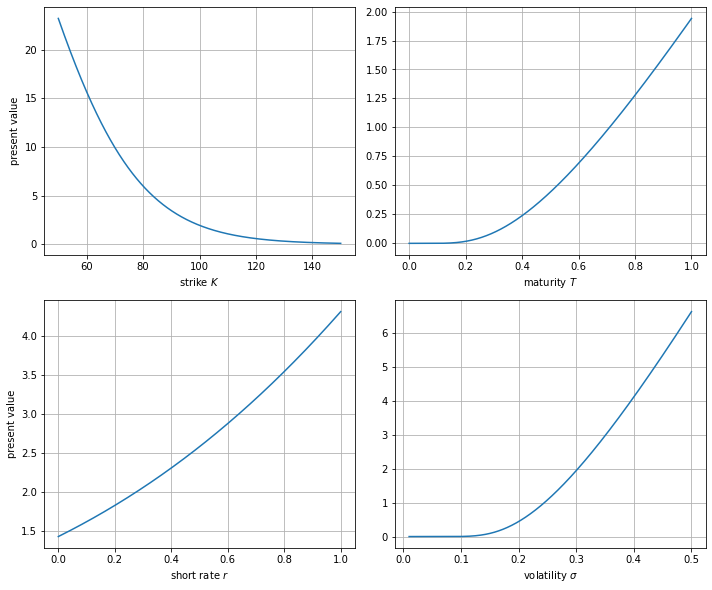

In [9]:
plot_values(BSM_call_value, 
            St = 70.0,
            K = 100.0,
            t = 0.0,
            T = 1.0,
            r = 0.05,
            sigma = 0.3)

### Plot variations in put-option prices with respect to parameters

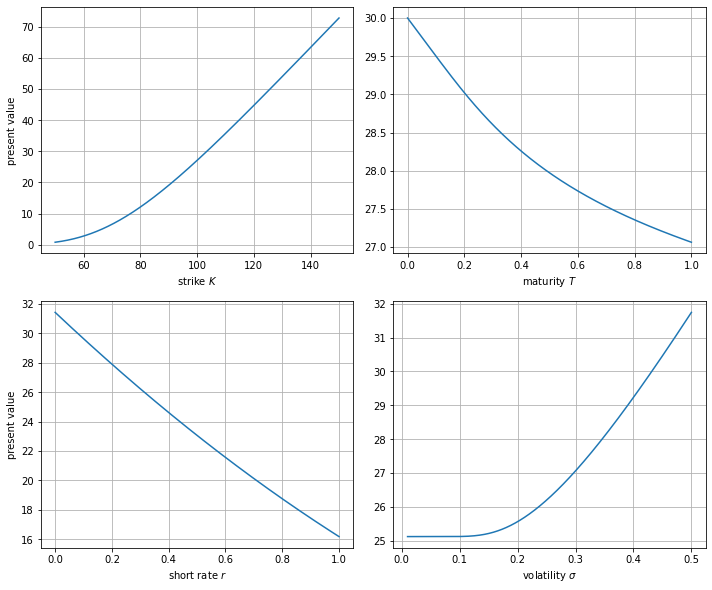

In [10]:
plot_values(BSM_put_value, 
            St = 70.0,
            K = 100.0,
            t = 0.0,
            T = 1.0,
            r = 0.05,
            sigma = 0.3)